#### 주파수 변조 신호의 수식

1. 시간 $t$ 에 따른 주파수 $f(t)$ 는 다음과 같이 선형적으로 증가합니다:
   $$
   f(t) = f_0 + \frac{f_1 - f_0}{T} t
   $$
   여기서 $f_0$ 는 시작 주파수, $f_1$ 는 종료 주파수, $T$ 는 전체 신호의 지속 시간입니다.

2. 즉각적인 주파수에 따른 각주파수 $\omega(t)$ 는 다음과 같습니다:
   $$\omega(t) = 2 \pi f(t) = 2 \pi \left( f_0 + \frac{f_1 - f_0}{T} t\right)
   $$

3. 각주파수 $\omega(t)$ 를 시간에 대해 적분하면 위상 $\phi(t)$ 를 얻을 수 있습니다:
   $$
   \phi(t) = \int \omega(t) \, dt = \int 2 \pi \left( f_0 + \frac{f_1 - f_0}{T} t \right) dt
   $$

4. 위상 $\phi(t)$ 는 다음과 같이 계산됩니다:
   $$
   \phi(t) = 2 \pi \left( f_0 t + \frac{f_1 - f_0}{T} \frac{t^2}{2} \right)
   $$

5. 따라서 신호 $x(t)$ 는 다음과 같이 표현됩니다:
   $$
   x(t) = \sin(\phi(t)) = \sin \left( 2 \pi \left( f_0 t + \frac{f_1 - f_0}{T} \frac{t^2}{2} \right) \right)
   $$

#### 예제 신호에 적용
주어진 예제에서 $f_0 = 50$ Hz, $f_1 = 300$ Hz, $T = 2$ 초이므로, 신호는 다음과 같습니다:
$$
x(t) = \sin \left( 2 \pi \left( 50t + \frac{300 - 50}{2} \frac{t^2}{2} \right) \right) = \sin \left( 2 \pi \left( 50t + 125t^2 \right) \right)
$$

따라서, 예제에서 사용된 신호의 수식은 다음과 같습니다:
$$
x(t) = \sin \left( 2 \pi \left( 50t + 125t^2 \right) \right)
$$

이 수식은 시간 $t$ 에 따라 주파수가 선형적으로 증가하는 신호를 정확하게 나타냅니다.

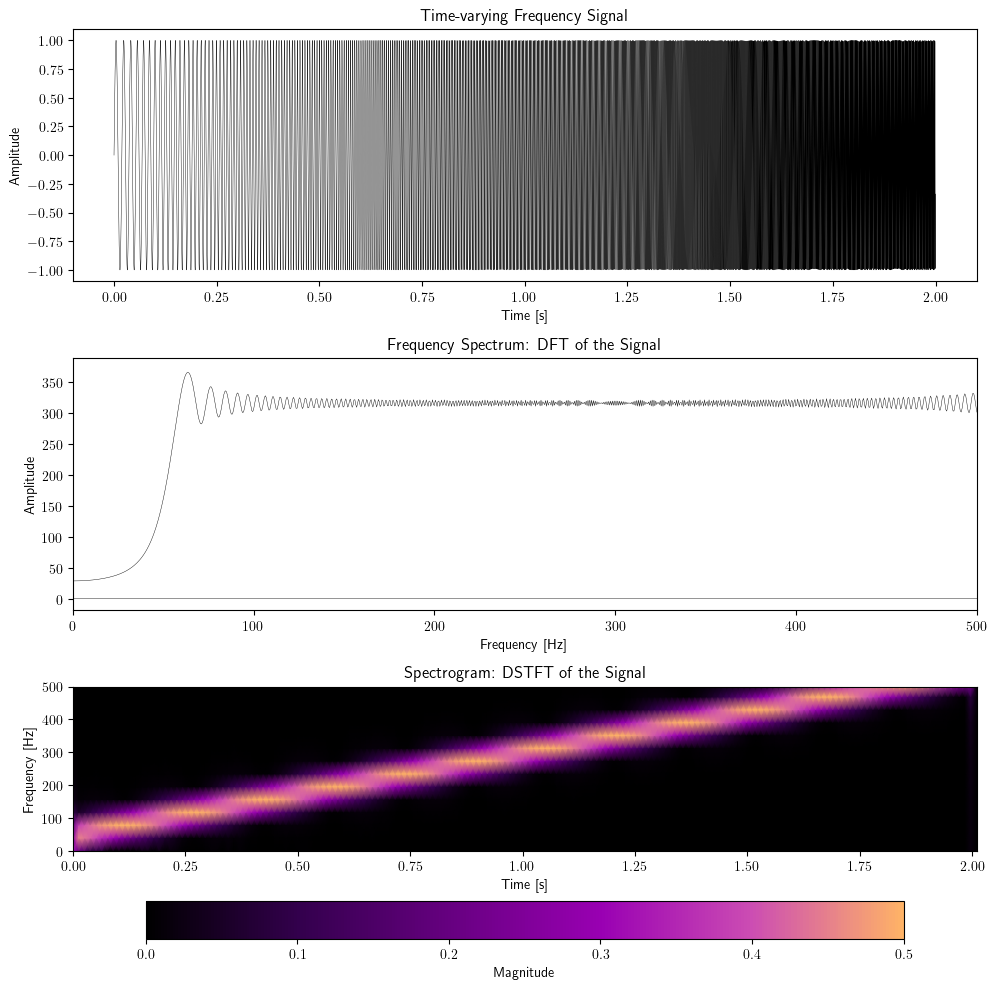

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import stft
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams['text.usetex'] = True
# Define a custom colormap
colors = [
    (0.0, 0.0, 0.0),    # Black
    (0.2, 0.0, 0.3),    # Dark Purple
    (0.4, 0.0, 0.5),    # Purple
    (0.6, 0.0, 0.7),    # Bright Purple
    (0.8, 0.3, 0.7),    # Light Purple
    (1.0, 0.7, 0.4)     # Yellow/Orange
]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# 샘플링 주파수 및 시간 축 설정
fs = 10000
t = np.linspace(0, 2, 2 * fs, endpoint=False)

# 주파수가 선형적으로 증가하는 신호 생성
f0 = 50  # 시작 주파수
f1 = 300  # 종료 주파수
signal = np.sin(2 * np.pi * (f0 + (f1 - f0) * t / 2) * t)

# 푸리에 변환 수행
yf = fft(signal)
xf = fftfreq(len(t), 1 / fs)

# STFT 수행
f, t_stft, Zxx = stft(signal, fs, nperseg=256)

# 그림 생성
fig, axes = plt.subplots(3, 1, figsize=(10, 10), tight_layout=True)

# 원 신호
axes[0].plot(t, signal,color='k',linewidth=0.3)
axes[0].set_title(r"Time-varying Frequency Signal")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Amplitude")

# 푸리에 변환 결과
axes[1].plot(xf, np.abs(yf),color='k',linewidth=0.3)
axes[1].set_title("Frequency Spectrum: DFT of the Signal")
axes[1].set_xlabel("Frequency [Hz]")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlim(0, 500)

# STFT 결과
im = axes[2].pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud', cmap=cmap)
axes[2].set_title("Spectrogram: DSTFT of the Signal")
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Frequency [Hz]")
axes[2].set_ylim(0, 500)

# Color bar below the STFT plot
cbar = fig.colorbar(im, ax=axes[2], orientation='horizontal', pad=0.2)
cbar.set_label('Magnitude')

# 그림 저장
plt.tight_layout()
plt.savefig("./Dropbox/03_Yechan3/연구/교수님이랑/MS_Review/signal_analysis.pdf")
plt.show()

The provided figures illustrate the analysis of a signal whose frequency varies linearly over time. The analysis consists of three main parts: the time-domain signal, its Fourier Transform, and its Short-Time Fourier Transform (STFT).

The top plot shows the signal in the time domain. This signal starts at a low frequency of 50 Hz and linearly increases to a high frequency of 300 Hz over a span of 2 seconds. The mathematical representation of this signal is \( s(t) = \sin\left(2\pi \left(f_0 + \frac{f_1 - f_0}{2} t\right) t\right) \), where \( f_0 \) is the initial frequency and \( f_1 \) is the final frequency. This plot provides a clear view of how the signal's amplitude varies with time.

The middle plot depicts the Fourier Transform of the signal, displaying the frequency spectrum. The x-axis represents the frequency in Hz, and the y-axis indicates the amplitude of each frequency component. Unlike a pure sine wave, which would show a single peak at a specific frequency, this plot reveals a spread of frequencies. This spread occurs because the signal's frequency changes over time, causing it to contain multiple frequency components simultaneously. However, this plot does not convey when these frequency changes occur.

The bottom plot presents the STFT of the signal, providing a time-frequency representation. Here, the x-axis represents time in seconds, the y-axis represents frequency in Hz, and the color intensity indicates the magnitude of the frequency components. The STFT divides the signal into short segments and computes the Fourier Transform for each segment, thereby revealing how the frequency content of the signal evolves over time. This plot clearly shows the linear increase in frequency from 50 Hz to 300 Hz as time progresses, offering a detailed view of the signal's time-varying frequency characteristics.

The key points of comparison between the Fourier Transform and STFT are as follows:

1. **Inclusion of Time Information:**
   - Fourier Transform: It provides the frequency components of the entire signal without any information about when these frequencies occur. This makes it useful for analyzing the overall frequency content but not for understanding time-dependent changes.
   - STFT: It includes both time and frequency information, allowing us to observe how the frequency content of the signal changes over time. This is essential for analyzing signals with time-varying frequencies.

2. **Time-Frequency Resolution:**
   - Fourier Transform: It offers high frequency resolution but no time resolution, as it considers the entire signal duration.
   - STFT: It provides a trade-off between time and frequency resolution. By segmenting the signal into smaller time windows, STFT sacrifices some frequency resolution to gain time resolution, making it possible to track changes in frequency over time.

3. **Detection of Frequency Changes:**
   - Fourier Transform: While it can detect the presence of multiple frequency components, it cannot indicate when these changes occur within the signal.
   - STFT: It clearly shows when frequency changes happen, as illustrated by the linear increase in frequency over time in the STFT plot. This makes STFT particularly useful for signals with non-stationary frequency content.

Both the Fourier Transform and STFT are powerful tools for signal analysis, but they serve different purposes. The Fourier Transform is ideal for identifying the overall frequency components of a signal, whereas the STFT is better suited for analyzing signals whose frequency content changes over time. In this analysis, the STFT provides a comprehensive view of the time-varying frequency characteristics of the signal, highlighting its ability to capture the dynamic nature of the signal's frequency evolution.

---